In [27]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Reading an excel file with 3 sheets - usage, cost, issues
xls = pd.ExcelFile('Analytics.xls')

df1 = pd.read_excel(xls, 'Usage')
df2 = pd.read_excel(xls, 'Cost')
df3 = pd.read_excel(xls, 'Issues')

In [29]:
#data usage
df1

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb
0,1,76,100
1,2,85,100
2,3,89,100
3,4,21,100
4,5,24,100
...,...,...,...
195,196,216,300
196,197,196,300
197,198,300,300
198,199,293,300


In [30]:
#Cost - Cost for the plan that customer chose
df2

,Customer No,Plan Cost in $
0,121,200
1,98,150
2,164,300
3,86,150
4,135,200
...,...,...
195,16,100
196,111,200
197,23,100
198,75,150


In [31]:
#Issues - Number of problems faced by customers
df3

,Customer No,Average Issues per Month
0,106,3
1,144,15
2,64,17
3,114,0
4,62,18
...,...,...
195,77,7
196,187,7
197,63,13
198,43,5


In [32]:
# sorting both cost and issues dataframe by Customer No
df2 = df2.sort_values(by=['Customer No'], ascending=True)
df3 = df3.sort_values(by=['Customer No'], ascending=True)

In [33]:
#Merging all the dataframes into one dataframe based on Customer No
df = pd.merge(df1, df2, on='Customer No')
df = pd.merge(df, df3, on='Customer No')
df

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month
0,1,76,100,100,5
1,2,85,100,100,18
2,3,89,100,100,11
3,4,21,100,100,1
4,5,24,100,100,12
...,...,...,...,...,...
195,196,216,300,300,0
196,197,196,300,300,12
197,198,300,300,300,12
198,199,293,300,300,10


# Segmenting happy customers and unhappy customers

C:\Users\vvenkatesan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


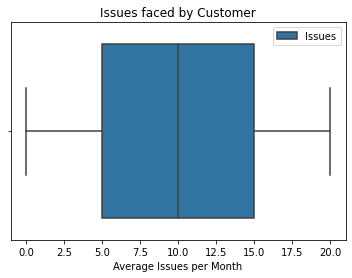

In [34]:
#Plotting box plot to find happy customers

sns.boxplot(df["Average Issues per Month"])

plt.title("Issues faced by Customer")
  
# Adding the legends
plt.legend(["Issues"])
plt.show()

#Median = 10, Q1(25th percentile) = 5, Q2(75th percentile) = 15, min issue = 0, max issue = 20, IQR = 10

In [35]:
#Finding value at 25th percentile
Q1 = np.percentile(df['Average Issues per Month'], 25, interpolation = 'midpoint')
Q1

5.0

In [36]:
#No of issue less than or equal to 25th percentile, he/she is considered a happy customer else not
df['Average Issues per Month'] = pd.to_numeric(df['Average Issues per Month'])

def categorise(row):  
    if row['Average Issues per Month'] <= Q1 :
        return 'yes'
    return 'no'


df['Happy Customer'] = df.apply(lambda row: categorise(row), axis=1)

In [37]:
df

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month,Happy Customer
0,1,76,100,100,5,yes
1,2,85,100,100,18,no
2,3,89,100,100,11,no
3,4,21,100,100,1,yes
4,5,24,100,100,12,no
...,...,...,...,...,...,...
195,196,216,300,300,0,yes
196,197,196,300,300,12,no
197,198,300,300,300,12,no
198,199,293,300,300,10,no


In [38]:
#Count of happy and unhappy customers
dff = df.groupby(['Happy Customer'])['Happy Customer'].count()
dff

Happy Customer
no     143
yes     57
Name: Happy Customer, dtype: int64

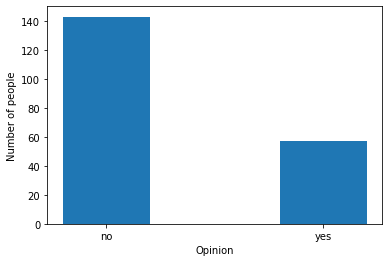

In [39]:
#Plotting the same in the form of bar graph
keys = [count for count, d in df.groupby(['Happy Customer'])]

plt.bar(keys,df.groupby(['Happy Customer'])['Happy Customer'].count(), width = 0.4)
plt.ylabel('Number of people')
plt.xlabel('Opinion')
#plt.xticks(keys)
plt.show()

In [40]:
#Getting the list of happy customers
df_happy = df.loc[df['Happy Customer'] == "yes"]
print("There are " , len(df_happy) , " happy customers. List Below:\n ", df_happy['Customer No'].to_string(index=False))

There are  57  happy customers. List Below:
    1
  4
 10
 12
 14
 16
 17
 18
 21
 25
 32
 41
 43
 47
 50
 54
 56
 67
 71
 80
 81
 82
 85
 96
100
102
104
106
108
113
114
117
118
120
121
122
124
127
131
134
139
140
149
152
154
158
160
161
172
175
176
182
184
186
189
193
196


In [41]:
#Getting the list of unhappy customers
df_unhappy = df.loc[df['Happy Customer'] == "no"]
print("There are " , len(df_unhappy) , " unhappy customers. List Below:\n ", df_unhappy['Customer No'].to_string(index=False))

There are  143  unhappy customers. List Below:
    2
  3
  5
  6
  7
  8
  9
 11
 13
 15
 19
 20
 22
 23
 24
 26
 27
 28
 29
 30
 31
 33
 34
 35
 36
 37
 38
 39
 40
 42
 44
 45
 46
 48
 49
 51
 52
 53
 55
 57
 58
 59
 60
 61
 62
 63
 64
 65
 66
 68
 69
 70
 72
 73
 74
 75
 76
 77
 78
 79
 83
 84
 86
 87
 88
 89
 90
 91
 92
 93
 94
 95
 97
 98
 99
101
103
105
107
109
110
111
112
115
116
119
123
125
126
128
129
130
132
133
135
136
137
138
141
142
143
144
145
146
147
148
150
151
153
155
156
157
159
162
163
164
165
166
167
168
169
170
171
173
174
177
178
179
180
181
183
185
187
188
190
191
192
194
195
197
198
199
200


# Recommend Higher Revenue Plans

### Plans are recommended to only happy customers(less issues) with not the highest data plan chosen, also with customers who use more than half of the total data available

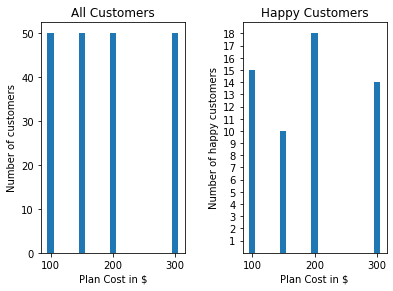

In [42]:
#No of customers choosing different plans
plt.subplot(1, 2, 1)
keys = [plan for plan, d in df.groupby(['Plan Cost in $'])]
plt.bar(keys,df.groupby(['Plan Cost in $'])['Plan Cost in $'].count(), width = 10.0)
plt.ylabel('Number of customers')
plt.xlabel('Plan Cost in $')
plt.title("All Customers")

#No of happy customers choosing different plans
plt.subplot(1, 2, 2)
keys = [plan for plan, d in df_happy.groupby(['Plan Cost in $'])]
y = df_happy.groupby(['Plan Cost in $'])['Plan Cost in $'].count()
plt.bar(keys ,y ,width = 10.0)
plt.ylabel('Number of happy customers')
plt.xlabel('Plan Cost in $')
import math
yint = range(1, math.ceil(max(y))+1)
plt.yticks(yint)
plt.title("Happy Customers")

#plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [43]:
#Different data plans available
df.groupby(['Total Monthly Limit in gb'])['Total Monthly Limit in gb'].count()

Total Monthly Limit in gb
100    50
150    50
200    50
300    50
Name: Total Monthly Limit in gb, dtype: int64

In [44]:
#All happy customers who have not chosen last available plan
max_limit = df['Total Monthly Limit in gb'].max()
df_happy_nl = df_happy[(df_happy['Total Monthly Limit in gb'] <  max_limit)]

In [45]:
#Finding about the data usage level of all the happy customers who has not chosen highest plan 
df_happy_nl['Average Monthly Usage in gb'] = pd.to_numeric(df_happy_nl['Average Monthly Usage in gb'])
df_happy_nl['Total Monthly Limit in gb'] = pd.to_numeric(df_happy_nl['Total Monthly Limit in gb'])

def func(row):  
    val = (float)(row['Average Monthly Usage in gb']/row['Total Monthly Limit in gb'])
    if val >= 0.5 :
        return 'high'
    return 'low'


df_happy_nl['Data Usage'] = df_happy_nl.apply(lambda row: func(row), axis=1)

C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\3865820273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_nl['Average Monthly Usage in gb'] = pd.to_numeric(df_happy_nl['Average Monthly Usage in gb'])
C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\3865820273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_nl['Total Monthly Limit in gb'] = pd.to_numeric(df_happy_nl['Total Monthly Limit in gb'])
C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\3865820273.py:12

In [46]:
df_happy_nl

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month,Happy Customer,Data Usage
0,1,76,100,100,5,yes,high
3,4,21,100,100,1,yes,low
9,10,32,100,100,4,yes,low
11,12,26,100,100,2,yes,low
13,14,20,100,100,2,yes,low
15,16,21,100,100,5,yes,low
16,17,22,100,100,3,yes,low
17,18,64,100,100,0,yes,high
20,21,17,100,100,1,yes,low
24,25,89,100,100,1,yes,high


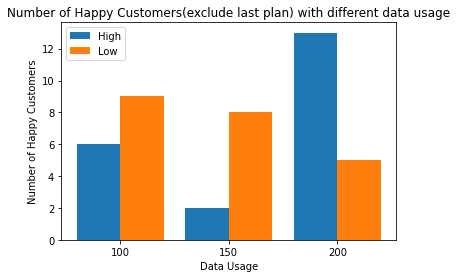

In [47]:
#Number of Happy Customers(exclude last plan) with different data usage - high and low
k = df_happy_nl[(df_happy_nl['Data Usage'] == "high")]
k = k.groupby(['Total Monthly Limit in gb']).count()['Customer No']
l = df_happy_nl[(df_happy_nl['Data Usage'] == "low")]
l = l.groupby(['Total Monthly Limit in gb']).count()['Customer No']

keys = [limit for limit, d in df_happy_nl.groupby(['Total Monthly Limit in gb'])]
X_axis = np.arange(len(keys))

plt.bar(X_axis - 0.2, k, 0.4, label = 'High')
plt.bar(X_axis + 0.2, l, 0.4, label = 'Low')
plt.xticks(X_axis, keys)
plt.xlabel("Data Usage")
plt.ylabel("Number of Happy Customers")
plt.title("Number of Happy Customers(exclude last plan) with different data usage")
plt.legend()
plt.show()

In [48]:
#Ans - Recommending higher plan
rhp = df_happy_nl[(df_happy_nl['Data Usage'] == "high")]['Customer No']
print(len(rhp) , "customers are recommended higher revenue plan. Required Customers are \n" , rhp.to_string(index=False))

21 customers are recommended higher revenue plan. Required Customers are 
   1
 18
 25
 32
 41
 50
 82
100
104
106
108
113
114
120
121
122
127
131
134
139
140


# Discount Possibilities for Unhappy customers

### For all the unhappy customers, checking out if discounts can be provided.

This is applicalbe only if a customer uses less than three fourth of the total amount. 

Process - There are two criteria:
1. Finding a plan that is just lower than the amount used and charge for extra data using a multiplier ($x per gb)
2.Finding a plan just higher than the amount used.

Compare both the costs(1 and 2) and choose the one with the lowest cost for every customer

In [49]:
#Differnt plans and their corresponding costs stored in 2 different arrays in ascending order
x = sorted(df_unhappy['Total Monthly Limit in gb'].unique())
y = sorted(df_unhappy['Plan Cost in $'].unique())

In [50]:
#Function for mapping a plan with its corresponding cost
def mapping(m):
    ans = [y[i] for i in range(len(x)) if m == x[i]]
    return ans

#Function for finding a plan that is just lower than the used amount
def floorSearch(arr, low, high, x):
 
        # If low and high cross each other
        if (low > high):
            return -1

        # If last element is smaller than x
        if (x >= arr[high]):
            return high

        # Find the middle point
        mid = int((low + high) / 2)

        # If middle point is floor.
        if (arr[mid] == x):
            return mid

        # If x lies between mid-1 and mid
        if (mid > 0 and arr[mid-1] <= x
                    and x < arr[mid]):
            return mid - 1

        # If x is smaller than mid, 
        # floor must be in left half.
        if (x < arr[mid]):
            return floorSearch(arr, low, mid-1, x)

        # If mid-1 is not floor and x is greater than
        # arr[mid],
        return floorSearch(arr, mid + 1, high, x)

In [51]:
median = np.median(x)
print(median)
#Initializing
df_unhappy['Discount Possibilities'] = ""
df_unhappy['Discount Amount'] = 0

175.0


C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\3746945303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unhappy['Discount Possibilities'] = ""
C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\3746945303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unhappy['Discount Amount'] = 0


In [52]:
def func2(): 
    
    mul = 1  
    q = 0
    cost = 0   
    final = 0
    
    for ind in df_unhappy.index:
        
        #val - check how much of the total amount of data provided is used
        val = (df_unhappy['Average Monthly Usage in gb'][ind])/(df_unhappy['Total Monthly Limit in gb'][ind])
        
        #mul - Finding out a suitable multiplier - 1.25 chosen if amt used is less than median of plans available or 
        #has used less than half of the amount for the plans higher than median, else mul =1.5
        #median = 175, so with plans 0gb, 100gb, 150gb, mul = 1.25 and for 200gb, mul both 1.25 and 1.5
        if (df_unhappy['Total Monthly Limit in gb'][ind] <= median) or (df_unhappy['Total Monthly Limit in gb'][ind] > median
                                                                     and val < 0.5):
            mul = 1.25
        else:
            mul = 1.5
            
        
        #Checking out different discouts possible for unhappy customers who have used less than three fourth of total amt
        
        #Plan 1, cost found
        if val < 0.75 :
            floor_val = floorSearch(x, 0, len(x)-1, df_unhappy['Average Monthly Usage in gb'][ind])
             
            #No plan found lower than the amount used. Eg. 54gb used, and lowest plan available = 100gb    
            if (floor_val == -1):
                cost = df_unhappy['Average Monthly Usage in gb'][ind] * mul
            else:
                q = x[floor_val]
                cost = mapping(q) + ((df_unhappy['Average Monthly Usage in gb'][ind]-mapping(q)) * mul)

            #Plan 2
            
            #Plan that is just higher than the amount used - ceil_val
            ceil_val = [x[floor_val+1] if floor_val<(len(x)) else 0]
        
            ceil_val_st = [str(item) for item in ceil_val]
            strings = "".join(ceil_val_st)
            ceil_val = int(strings)
            u = mapping(ceil_val)
            
            #diff between plan 1 and plan 2
            diff = cost - u
            if diff>=0:
                #Plan 2 better
                final = str(ceil_val) + "gb plan"
                disc_val = u
            else:
                #Plan 1 better    
                final = str(q) + "gb plan and " + str(mul) + " multiplier on extra gb"
                disc_val = cost
            
            
            df_unhappy['Discount Possibilities'][ind] = final
            df_unhappy['Discount Amount'][ind] = (df_unhappy['Plan Cost in $'][ind] - disc_val)
            

        else:
            #No discounts given to unhappy customer
            df_unhappy['Discount Possibilities'][ind] = "No"
            df_unhappy['Discount Amount'][ind] = 0
            
            

func2()

C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\880354260.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unhappy['Discount Possibilities'][ind] = "No"
C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\880354260.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unhappy['Discount Amount'][ind] = 0
C:\Users\vvenkatesan\AppData\Local\Temp\ipykernel_26320\880354260.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [53]:
#Printing diiferent plans for all unhappy customers
df_unhappy

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month,Happy Customer,Discount Possibilities,Discount Amount
1,2,85,100,100,18,no,No,0.0
2,3,89,100,100,11,no,No,0.0
4,5,24,100,100,12,no,0gb plan and 1.25 multiplier on extra gb,70.0
5,6,93,100,100,17,no,No,0.0
6,7,22,100,100,9,no,0gb plan and 1.25 multiplier on extra gb,72.5
...,...,...,...,...,...,...,...,...
194,195,108,300,300,15,no,100gb plan and 1.25 multiplier on extra gb,190.0
196,197,196,300,300,12,no,200gb plan,100.0
197,198,300,300,300,12,no,No,0.0
198,199,293,300,300,10,no,No,0.0


In [54]:
#Grouping customers based on different offers provided
df_unhappy.groupby(['Discount Possibilities']).count()['Customer No']

Discount Possibilities
0gb plan and 1.25 multiplier on extra gb      24
100gb plan                                    16
100gb plan and 1.25 multiplier on extra gb    29
100gb plan and 1.5 multiplier on extra gb      7
150gb plan                                     6
150gb plan and 1.5 multiplier on extra gb      2
200gb plan                                     3
200gb plan and 1.5 multiplier on extra gb      7
No                                            49
Name: Customer No, dtype: int64

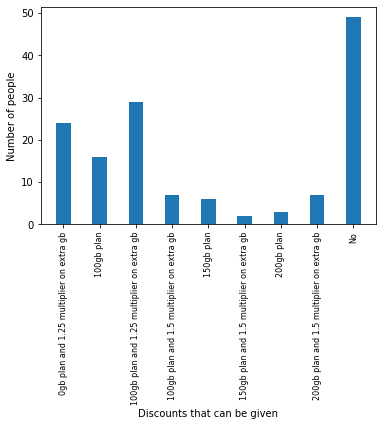

In [55]:
#Bar graph for the above
keys = [count for count, d in df_unhappy.groupby(['Discount Possibilities'])]

plt.bar(keys,df_unhappy.groupby(['Discount Possibilities'])['Discount Possibilities'].count(), width = 0.4)
plt.ylabel('Number of people')
plt.xlabel('Discounts that can be given')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [56]:
#Customers - 100gb plan and 1.5 multiplier on extra gb
df_unhappy.loc[df_unhappy['Discount Possibilities'] == "100gb plan and 1.5 multiplier on extra gb"]

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month,Happy Customer,Discount Possibilities,Discount Amount
111,112,104,200,200,7,no,100gb plan and 1.5 multiplier on extra gb,94.0
118,119,104,200,200,9,no,100gb plan and 1.5 multiplier on extra gb,94.0
127,128,124,200,200,8,no,100gb plan and 1.5 multiplier on extra gb,64.0
128,129,108,200,200,18,no,100gb plan and 1.5 multiplier on extra gb,88.0
129,130,103,200,200,17,no,100gb plan and 1.5 multiplier on extra gb,95.5
140,141,113,200,200,10,no,100gb plan and 1.5 multiplier on extra gb,80.5
143,144,113,200,200,15,no,100gb plan and 1.5 multiplier on extra gb,80.5


In [57]:
#Customers - [150]gb plan
df_unhappy.loc[df_unhappy['Discount Possibilities'] == "150gb plan"]

,Customer No,Average Monthly Usage in gb,Total Monthly Limit in gb,Plan Cost in $,Average Issues per Month,Happy Customer,Discount Possibilities,Discount Amount
104,105,138,200,200,19,no,150gb plan,50.0
110,111,135,200,200,9,no,150gb plan,50.0
134,135,149,200,200,7,no,150gb plan,50.0
168,169,140,300,300,15,no,150gb plan,150.0
178,179,144,300,300,8,no,150gb plan,150.0
182,183,147,300,300,16,no,150gb plan,150.0


## Check if there are any other issues other than cost

In [66]:
#Issues regarding continuous data provision

#Comparing Customers with High issues & high data usage with total number of unhappy customers
#If value is high(say greater than 0.5, even that's considered an actual reason with the available parameters)

hch = df_unhappy[((df_unhappy['Average Monthly Usage in gb']/df_unhappy['Total Monthly Limit in gb']) >= 0.5)]
point = len(hch)/len(df_unhappy)
print(point)
if point>0.5:
    print("There are issues regarding continuous data provision")

0.6503496503496503
There are issues regarding continuous data provision
